### Урок 3. Классификация. Логистическая регрессия.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2,  1, 3, 3, 1, 2]], dtype = np.float64)
y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [27]:
X

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 5.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [28]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [29]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [30]:
X_st = X.copy()
X_st[2, :] = calc_std_feat(X[2, :])

In [31]:
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  2.        ,  5.        ,  3.        ,
         0.        ,  5.        , 10.        ,  1.        ,  2.        ],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  2.        ,
         1.        ,  3.        ,  3.        ,  1.        ,  2.        ]])

In [32]:
def calc_logloss(y, y_pred):
    err = - np.mean(y * np.log(y_pred +1e-20) + (1.0 - y) * np.log(1.0 - y_pred+1e-20))
    err = np.sum(err)
    return err

In [33]:
# Пример применения
y1 = np.array([1, 0])
y_pred1 = np.array([0.9, 0.1])
calc_logloss(y1, y_pred1)

0.10536051565782628

In [34]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [35]:
z = np.linspace(-10, 10, 101)

In [36]:
probabilities = sigmoid(z)

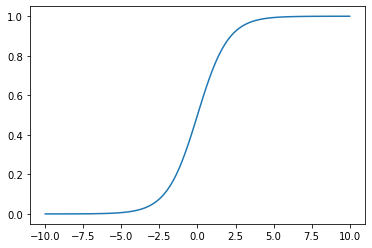

In [37]:
plt.plot(z, probabilities)
plt.show()

Logistic Regression

In [38]:
def eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [39]:
W = eval_model(X_st, y, iterations=5000, alpha=1e-4)

500 [ 0.47822106 -0.20918419  0.64605995  1.49531432] 1.0559639161585663
1000 [ 0.46074241 -0.27647603  0.64395686  1.46891696] 0.945214871179169
1500 [ 0.44435675 -0.33951515  0.64152026  1.44406912] 0.8478360281905125
2000 [ 0.42913461 -0.39751872  0.63899625  1.42106251] 0.7651177745022372
2500 [ 0.41513888 -0.44956784  0.63671032  1.40023024] 0.6981293270105478
3000 [ 0.40240136 -0.49488241  0.63498247  1.38184975] 0.6468813805442176
3500 [ 0.39088925 -0.53321212  0.63401986  1.36601535] 0.6097021563515638
4000 [ 0.38049869 -0.56497213  0.63387116  1.35259671] 0.5836774145473647
4500 [ 0.37108342 -0.59102182  0.63446603  1.3413119 ] 0.5657147376221167
5000 [ 0.36249064 -0.61234585  0.63568321  1.33183158] 0.5532737788236778


## Д/з

1*. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.
3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).
4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).
5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.
6. Могла ли модель переобучиться? Почему?

1*. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

In [40]:
def calc_logloss(y, y_pred):
    err = - np.mean(y * np.log(y_pred +1e-20) + (1.0 - y) * np.log(1.0 - y_pred+1e-20))
    err = np.sum(err)
    return err

2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [41]:
W = eval_model(X_st, y, iterations=50000, alpha=2)

5000 [-34.08999108  -3.45806911  -9.17356022  28.05569736] 0.11339507150121717
10000 [-45.07148835  -4.41871588 -12.28100195  36.8460101 ] 0.09217670190601848
15000 [-52.99460421  -5.06306361 -14.561058    43.07729244] 0.08140568301122553
20000 [-59.62784963  -5.5594211  -16.50668362  48.20598267] 0.07395913841639622
25000 [-65.53781589  -5.96967199 -18.26671761  52.71316267] 0.06810317820836856
30000 [-70.9610916   -6.32596748 -19.89804532  56.81098377] 0.06320128799321205
35000 [-76.01227061  -6.64663504 -21.42624364  60.60683511] 0.05896348494700303
40000 [-80.75515498  -6.94202894 -22.8655799   64.16052249] 0.05523401152912264
45000 [-85.23068067  -7.21801288 -24.22587666  67.50887312] 0.05191624011729397
50000 [-89.46847675  -7.47806696 -25.51485744  70.67709852] 0.04894292264890898


после 10000 итераций видно переобучение.

In [42]:
W = eval_model(X_st, y, iterations=10000, alpha=2)

1000 [-16.75789148  -1.88159228  -4.21449963  14.0249283 ] 0.18483279237296646
2000 [-22.91969608  -2.44913639  -6.00613694  19.00746993] 0.15083237131363741
3000 [-27.44151275  -2.85802988  -7.29502194  22.67820838] 0.1328505853238632
4000 [-31.05298063  -3.18469481  -8.31683117  25.6029414 ] 0.12143700007371264
5000 [-34.08999108  -3.45806911  -9.17356022  28.05569736] 0.11339507150121717
6000 [-36.73460155  -3.69424205  -9.91926165  30.18519437] 0.1073156611432087
7000 [-39.0956119   -3.90298221 -10.58573636  32.08036082] 0.10248362799642594
8000 [-41.24285564  -4.09062815 -11.19315974  33.79829749] 0.09849744233795578
9000 [-43.22365898  -4.26151109 -11.75507955  35.37771684] 0.09511388651556131
10000 [-45.07148835  -4.41871588 -12.28100195  36.8460101 ] 0.09217670190601848


3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

In [43]:
def calc_pred_proba(W, X):
    y_pred_proba = sigmoid(np.dot(W, X))
    return y_pred_proba

In [45]:
calc_pred_proba(W, X_st)

array([3.51181178e-01, 3.40445965e-03, 1.00000000e+00, 9.06510462e-10,
       9.65578343e-01, 2.20262768e-02, 1.00000000e+00, 9.18614360e-03,
       6.57573754e-01, 9.99999995e-01])

4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [49]:
def calc_pred(W, X):
    y_pred_proba = calc_pred_proba(W, X)
    y_pred = (y_pred_proba > 0.7).astype(int)
    return y_pred

In [50]:
calc_pred(W, X_st)

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 1])

5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

In [60]:
y_pred = calc_pred(W, X_st)
TP = 0
FP = 0
FN = 0
TN = 0
for y_pred, n in zip(y_pred, y): 
    if y_pred ==1:
        if n ==1: 
            TP+=1
        else:
            FP+=1
    else:
        if n==1:
            FN+=1
        else:
            TN+=1
acc = (TP+FP)/(TP+FP+FN+TN)
prec = TP/(TP+TN)
rec = TP/(TP+FN)
f_score = 2*prec*rec/(prec+rec)
print('acc ', acc,"\n", 'prec ', prec,"\n", 'rec ', rec,"\n", 'f_score ', f_score)

acc  0.4 
 prec  0.4444444444444444 
 rec  0.8 
 f_score  0.5714285714285714


6. Могла ли модель переобучиться? Почему?

модель могла переобучиться, потому что модель при большом количестве итераций по сути запоминает учебные данные. 